<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/11-3_LSTM_%ED%99%98%EC%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col='DATE')
df

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21
...,...
2020-03-09,1203.75
2020-03-10,1193.1
2020-03-11,1194.16


In [ ]:
df.columns = ['KOUS']

In [ ]:
df['KOUS'].replace('.', '', inplace=True)

In [ ]:
df['KOUS'] = pd.to_numeric(df['KOUS'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [ ]:
df['KOUS'].fillna(method='ffill', inplace=True)
df

,KOUS
DATE,
2015-03-13,1135.70
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21
...,...
2020-03-09,1203.75
2020-03-10,1193.10
2020-03-11,1194.16


# adfuller

In [ ]:
adfuller(df['KOUS'])
# P-Value : 0.08823317575724848 => 0.05보다 크므로 overfitting되기 쉬울 것이다.

(-2.6235188039221238,
 0.08823317575724848,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '10%': -2.56795049999266,
  '5%': -2.8637572934525286},
 8358.34690710183)

In [ ]:
adfuller(df['KOUS'].pct_change().dropna())
# P-Value 값이 0.0으로 작아졌다.

(-26.943541201332874,
 0.0,
 1,
 1303,
 {'1%': -3.435378572037035,
  '10%': -2.56795231450063,
  '5%': -2.863760700696655},
 -9698.633396210715)

# acf, pacf
- AR, MA 등 에 대한 [설명](https://yamalab.tistory.com/112)

In [ ]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
df_w = df.resample('W-Fri').last()
df_w

,KOUS
DATE,
2015-03-13,1135.70
2015-03-20,1113.87
2015-03-27,1103.60
2015-04-03,1085.65
2015-04-10,1093.13
...,...
2020-02-14,1183.20
2020-02-21,1207.91
2020-02-28,1214.92


In [ ]:
df_2017 = df_w[df_w.index.year == 2017]
df_2019 = df_w[df_w.index.year == 2019]

In [ ]:
df_2017.tail()

,KOUS
DATE,
2017-12-01,1082.36
2017-12-08,1092.03
2017-12-15,1086.39
2017-12-22,1076.87
2017-12-29,1067.42


In [ ]:
df_2019.tail()

,KOUS
DATE,
2019-11-29,1181.33
2019-12-06,1189.86
2019-12-13,1171.97
2019-12-20,1160.30
2019-12-27,1160.87


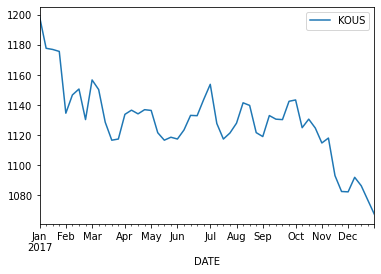

In [ ]:
df_2017.plot()
plt.show()

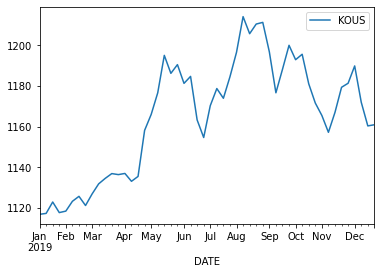

In [ ]:
df_2019.plot()
plt.show()

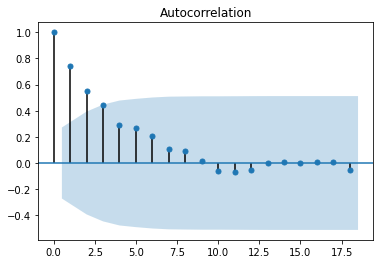

In [ ]:
plot_acf(df_2017)
plt.show()
# 들쑥날쑥한 걸 보니 AR 상태가 아니다

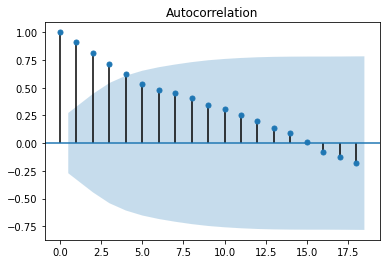

In [ ]:
plot_acf(df_2019)
plt.show()
# 기울기가 거의 일정한 것을 보니 AR이 맞다